# Stiffness

In [1]:
from sympy import solve, nsolve, symbols, sqrt, cos, sin
import numpy as np
import matplotlib.pyplot as plt

m=1.5
d=0.3265
theta  = 60*np.pi/180
dtheta = -210*np.pi/180
g=9.81

k = symbols('k', positive=True, real=True)
solutions = solve([ m*g/4*d*sin(theta+dtheta)*2 + 2*0.5*k*(dtheta**2)- m*g/4*d*sin(theta)*2 ])
kR = float(solutions[k])
print(f"m: {m}kg, d: {d}m, angle offset: {np.rad2deg(float(dtheta))}deg, k: {kR}N/m")

m: 1.5kg, d: 0.3265m, angle offset: -210.00000000000003deg, k: 0.2442749357167668N/m


# Optimal length **b**, **c** and corresponding force **F** for a given length **a**

In [2]:
npp=0.225
EAp=575
k=4.4
t  = -50*np.pi/180
dt = 20*np.pi/180
a, b, ct, ctdt= symbols('a b ct ctdt')
eq = [(ct**2) - ((a**2)+(b**2)-2*a*b*cos(t)), 
      (ctdt**2) - ((a**2)+(b**2)-2*a*b*cos(t+dt)),
      k*dt/(EAp*a*b*sin(t+dt)) - ( ctdt - ct*(1-npp))/(ct*ctdt)]
def f(cti, ctdti):
      return abs(EAp*(cti*(1-npp) - ctdti)/cti)

aS = []
bS = []
cS = []
fS = []
ill=0
for ai in np.linspace(0.1, 0.325, 100):
      try:
            solutions = nsolve([eqi.subs(a, ai) for eqi in eq], (b, ct, ctdt), (0.3, 0.3, 0.3))
            aS.append(ai)
            bS.append(solutions[0])
            cS.append(solutions[1])
            fS.append(f(solutions[1], solutions[2]))
      except:
            try:
                  solutions = nsolve([eqi.subs(a, ai) for eqi in eq], (b, ct, ctdt), (0.6, 0.6, 0.6))
                  aS.append(ai)
                  bS.append(solutions[0])
                  cS.append(solutions[1])
                  fS.append(f(solutions[1], solutions[2]))
            except:
                  ill += 1
            
print(ill)

6


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


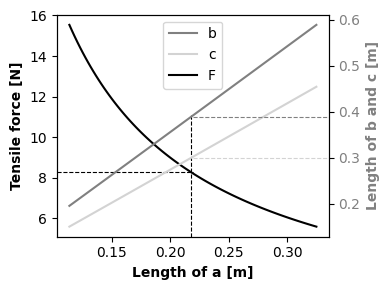

In [25]:
fig, ax1 = plt.subplots(figsize=(4, 3))
color = 'black'
fP = ax1.plot(aS, fS, label='F', color=color)
ax1.set_ylabel('Tensile force [N]', fontweight='bold', color=color)
ax1.set_xlabel('Length of a [m]', fontweight='bold')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'grey'
bP = ax2.plot(aS, bS, label='b', color=color, linestyle='-')
cP = ax2.plot(aS, cS, label='c', color='lightgrey', linestyle='-')
ax2.set_ylabel('Length of b and c [m]', fontweight='bold', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvline(0.218, ymax=0.55, color='black', lw=0.8, ls='--')
ax2.axhline(0.389, xmin=0.5, color='grey', lw=0.8, ls='--')
ax2.axhline(0.3, xmin=0.5, color='lightgrey', lw=0.8, ls='--')
ax1.axhline(8.3, xmax=0.5, color='black', lw=0.8, ls='--')


plt.tight_layout()
lns = bP+cP+fP
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper center')
plt.savefig('exports/length_a_effect.eps', format='eps', bbox_inches = 'tight')


#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [59]:
print(aS[6], bS[6], cS[6])


0.1272727272727273 0.220328315894705 0.169390345480000


70


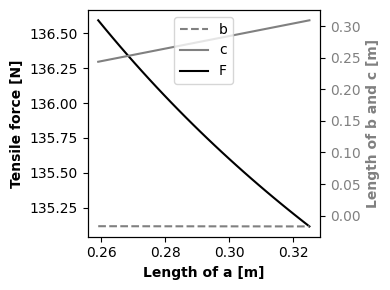

In [112]:
npp=0.225
EAp=575
k=4.4
t  = -160*np.pi/180
dt = 20*np.pi/180
a, ct, ctdt= symbols('a ct ctdt', real=True, positive=True)
b = symbols('b', positive=True, real=True)
eq = [(ct**2) - ((a**2)+(b**2)-2*a*b*cos(t)), 
      (ctdt**2) - ((a**2)+(b**2)-2*a*b*cos(t+dt)),
      k*dt/(EAp*a*b*sin(t+dt)) - ( ctdt - ct*(1-npp))/(ct*ctdt)]
def f(cti, ctdti):
      return abs(EAp*(cti*(1-npp) - ctdti)/cti)

aS = []
bS = []
cS = []
fS = []
ill=0
for ai in np.linspace(0.1, 0.325, 100):
      try:
            solutions = nsolve([eqi.subs(a, ai) for eqi in eq], (b, ct, ctdt), (0.3, 0.3, 0.3))
            aS.append(ai)
            bS.append(solutions[0])
            cS.append(solutions[1])
            fS.append(f(solutions[1], solutions[2]))
      except:
            try:
                  solutions = nsolve([eqi.subs(a, ai) for eqi in eq], (b, ct, ctdt), (0.01, 0.1, 0.1))
                  aS.append(ai)
                  bS.append(solutions[0])
                  cS.append(solutions[1])
                  fS.append(f(solutions[1], solutions[2]))
            except:
                  ill += 1
            
print(ill)
fig, ax1 = plt.subplots(figsize=(4, 3))
color = 'black'
fP = ax1.plot(aS, fS, label='F', color=color)
ax1.set_ylabel('Tensile force [N]', fontweight='bold', color=color)
ax1.set_xlabel('Length of a [m]', fontweight='bold')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'grey'
bP = ax2.plot(aS, bS, label='b', color=color, linestyle='--')
cP = ax2.plot(aS, cS, label='c', color=color, linestyle='-')
ax2.set_ylabel('Length of b and c [m]', fontweight='bold', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.tight_layout()
lns = bP+cP+fP
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper center')
#plt.savefig('exports/length_a_effect.eps', format='eps', bbox_inches = 'tight')


#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [94]:
for x in np.linspace(-0.3, 0.3, 10):
    for y in np.linspace(-0.6, 0.6, 10):
        try:
            nsolve([eqi.subs(a, 0.2) for eqi in eq], (b, ct, ctdt), (x, y,y))
            print(x, y)
        except:
            pass

-0.23333333333333334 0.6
-0.16666666666666666 0.33333333333333337
-0.16666666666666666 0.4666666666666667
-0.09999999999999998 0.06666666666666665
-0.09999999999999998 0.4666666666666667
-0.033333333333333326 -0.19999999999999996
-0.033333333333333326 0.06666666666666665
-0.033333333333333326 0.20000000000000007
-0.033333333333333326 0.33333333333333337
-0.033333333333333326 0.4666666666666667
-0.033333333333333326 0.6
0.033333333333333326 -0.6
0.033333333333333326 -0.4666666666666667
0.033333333333333326 -0.3333333333333333
0.033333333333333326 -0.19999999999999996
0.033333333333333326 -0.06666666666666665
0.033333333333333326 0.06666666666666665
0.10000000000000003 0.06666666666666665
0.16666666666666669 0.06666666666666665


In [10]:
for i in range(len(cS)):
    if abs(cS[i] - 0.3) < 1e-3:
        print(cS[i], fS[i], aS[i], bS[i], i)

0.300021926343850 8.25113322473288 0.2181818181818182 0.389399922016312 52
